## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In C:\Users\yogesh.kulkarni\AppData\Local\Continuum\anaconda3\envs\tf2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\yogesh.kulkarni\AppData\Local\Continuum\anaconda3\envs\tf2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\yogesh.kulkarni\AppData\Local\Continuum\anaconda3\envs\tf2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\yogesh.kulkarni\AppData\Local\Continuum\anaconda3\envs\tf2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

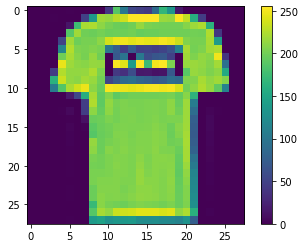

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
X_train = X_train/255.0

In [17]:
X_test = X_test/255.0

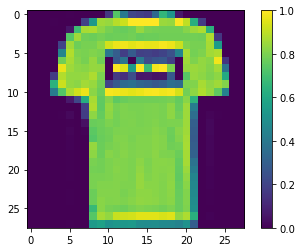

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [20]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function
- Optimizer
- Metrics

In [22]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5059 - accuracy: 0.8238
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3755 - accuracy: 0.8654
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3385 - accuracy: 0.8759
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3140 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2953 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2811 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2711 - accuracy: 0.8987
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2586 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2495 - accuracy: 0.9065
Epoch 10/10
60

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.885


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred = model.predict_classes(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.885

In [28]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

In [ ]:
pred[0]

In [ ]:
np.argmax(pred[0])

In [ ]:
np.argmax(pred[1])